In [91]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from itertools import combinations
from collections import Counter
from operator import itemgetter
from networkx.algorithms import community

In [3]:
df = pd.read_csv('data/hashtag_edges_short.csv')

In [45]:
# Dropping nan values in first two rows
#df.drop(df.index[0], inplace=True)


In [115]:
df.shape

(107838, 1)

In [124]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
# splits up string into two separate columns (nodes, representing edges)
data = [['americafirst', 'auditallvotes']]
edges_df = pd.DataFrame(data, columns = ['edge1', 'edge2'])

for index, row in df.iterrows():
    tup = row.values[0]
    tup = tup.replace("(", "")
    tup = tup.replace(")", "")
    tup = tup.replace("'", "")
    tup = tup.replace(",", "")
    tup = tup.split(' ')
    temp_data = [[tup[0], tup[1]]]
    temp_edges_df = pd.DataFrame(temp_data, columns = ['edge1', 'edge2'])
    edges_df = edges_df.append(temp_edges_df, ignore_index=True)

In [50]:
G = nx.MultiGraph()
G = nx.from_pandas_edgelist(edges_df, source='edge1', target='edge2')

In [55]:
print(G.number_of_edges())
print(G.number_of_nodes())

35661
4923


In [56]:
# creates dict of nodes
nodes = dict(G.nodes())

In [136]:
# converts to multigraph, with self-loops and parallel edges
hashG = nx.MultiGraph(G)

In [62]:
deg = dict(nx.degree(hashG))

In [74]:
isolates = nx.isolates(hashG)

In [137]:
hashG.remove_nodes_from(isolates)

In [138]:
isolates = nx.isolates(hashG)


In [83]:
sorted_degree = sorted(deg.items(), key=itemgetter(1), reverse=True)

In [86]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('stopthesteal', 4924)
('maga', 1202)
('trump', 904)
('trump2020', 638)
('fightfortrump', 540)
('wethepeople', 436)
('electionfraud', 402)
('fightback', 340)
('usa', 340)
('georgia', 337)
('washingtondc', 336)
('marchfortrump', 336)
('trumpwon', 323)
('kag', 317)
('antifa', 313)
('america', 296)
('electionintegrity', 287)
('americafirst', 285)
('patriots', 283)
('6-Jan', 278)


In [92]:
#betweenness_dict = nx.betweenness_centrality(hashG) # Run betweenness centrality
# eigenvector_dict = nx.eigenvector_centrality(hashG) # Run eigenvector centrality

In [93]:
communities = community.greedy_modularity_communities(hashG)

In [97]:
len(communities)

151

In [ ]:
# #creates a number value for each person based on community to which they belong

# modularity_dict = {} 
# for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
#     for name in c: # Loop through each person in a community
#         modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

In [99]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 5: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['weneedtermlimits', 'fakepolls', 'christmaseve', 'magaiscancelled', 'mailinballots', 'stochasticterrorism', 'coveredup', 'rhinos', 'dontsupportviolence', 'vrtnws', 'nospinecongress', 'corruptelections', 'expose2020', 'sayit', 'بايدن', 'sayhername', 'leveltheplayingfield', 'ccppuppet', 'ripfoxnews', 'returnstolenhomesandelection', 'bringmoartea', 'neverbackdown', 'corruptpoliticians', 'freedomwins', 'endthelockdown', 'trump2020thebestpresidentever', 'runoffsteal', 'electionsmatter', 'lindsaygraham', 'electoralcollegecertification', 'shutdowndc', 'copolitics', 'nigerians', 'donscon', 'immaculatedeception', 'letjusticeroll', 'crookedbigtech', 'theresistance', 'prayforpotustrump', 'donotvote2024', 'willnotconcede', 'freedomforall', 'pickandchoose', 'fakepresidentjoebiden', 'executiveorder', 'stillpraying', 'yankees', 'wwg1wg', 'gtfoalready', 'godwins', 'thelastbesthope', 'adrenochome', 'bidenstoleelection', 'lionsnotsheep', 'houndsoftwitter', 'taketheredpill', 'childrenoflight', 

In [106]:
#how to get neighbors
list(hashG.neighbors('wwg1wga'))

['americafirst',
 'stopthesteal',
 'wethepeople',
 'maga',
 'prayfortrump',
 'saveamerica',
 'thestormisuponus',
 'qarmy',
 'thegreatawakening',
 'digitalsoldiers',
 'holdtheline',
 'electionintegrity',
 'fullaudit',
 'potus',
 'eo13848',
 'fightforfreedom',
 'fightforamerica',
 'itsnotover',
 'fourmoreyears',
 'trump2020',
 'keepfightingmrpresident',
 'kraken',
 'fightback',
 'twitter',
 'realsocialmedua',
 'marchtosaveamerica',
 'stopthesteal2021',
 'savetrump',
 'fightfortrump',
 'thestormhasarrived',
 'unleashthekraken',
 'capitol',
 'pence',
 'darktolight',
 'stormisuponus',
 'betheplan',
 'hereistheevidence',
 'qanon',
 'dcprotests',
 'q',
 'facebook',
 'youtube',
 'tiktok',
 'godwins',
 'patriotsunited',
 'grahamtraitor',
 'trumptrain',
 'youth4trump',
 'trumparmy',
 'texas',
 'florida',
 'ohio',
 'california',
 'christian',
 'militarymoms',
 'militarywives',
 'yrnf',
 'wwg1wga_worldwide',
 'dccab',
 'magadorks',
 '25thamendment',
 'trumpisaloser',
 'niceredhatnerd',
 'proudboys

In [107]:
nx.degree_centrality(hashG)

{'americafirst': 0.05790329134498171,
 'auditallvotes': 0.0004063388866314506,
 'stopthesteal': 1.0004063388866313,
 'wynk': 0.0016253555465258025,
 'periscope': 0.0030475416497358796,
 'proamericareport': 0.0016253555465258025,
 'joebiden': 0.036164160910199104,
 'wethepeople': 0.08858187728565624,
 'maga': 0.24420967086550183,
 'stopthesteai2021': 0.03250711093051605,
 'stopthesteai2020': 0.018082080455099552,
 'prayfortrump': 0.005282405526208858,
 'prayforamerica': 0.012596505485574968,
 'saveamerica': 0.041040227549776515,
 'lockyhemup': 0.0016253555465258025,
 'holdaccountable': 0.0028443722064201544,
 'corruptdemocrats': 0.004876066639577408,
 'antifa': 0.06359203575782202,
 'domesticterrorists': 0.005485574969524583,
 'startthetrial': 0.0002031694433157253,
 'wwg1wga': 0.039618041446566436,
 'thestormisuponus': 0.005891913856156034,
 'qarmy': 0.00690776107273466,
 'thegreatawakening': 0.017878911011783828,
 'digitalsoldiers': 0.012596505485574968,
 'holdtheline': 0.045916294189

In [111]:
len(list(nx.find_cliques(hashG)))

27509

In [112]:
# can you put the cliques into new graph and draw them?

gl = list(nx.find_cliques(hashG))
# nx.draw(G, with_labels=True)

In [114]:
gl[0]

['stopthesteal',
 'patriotsneverconcede',
 'defundpoliticians',
 'counteverylegalvote',
 'trumpneverconcedes']

In [127]:
# # this seems important to drawing 
# betCent = nx.betweenness_centrality(hashG, normalized=True, endpoints=True)

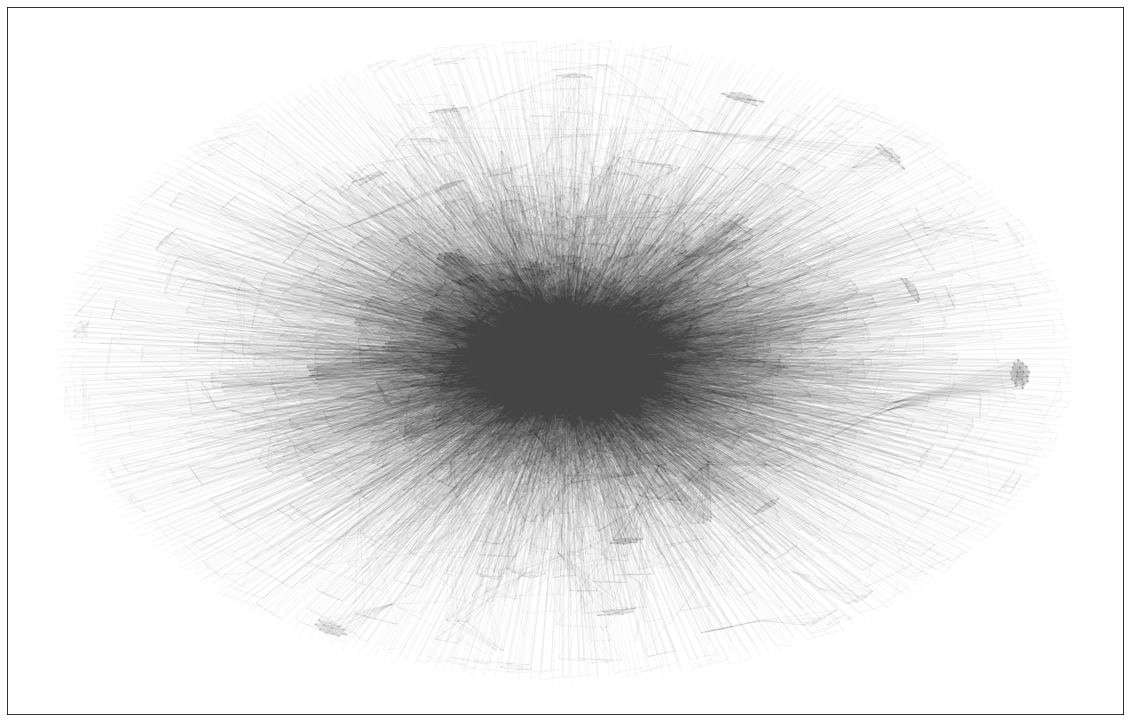

In [122]:
pos = nx.spring_layout(hashG, k=0.1) #fruchterman_reingold 
plt.rcParams.update({'figure.figsize': (20, 13)})
nx.draw_networkx(
    hashG, 
    pos=pos, 
    node_size=0, 
    edge_color="#444444", 
    alpha=0.05, 
    with_labels=False)

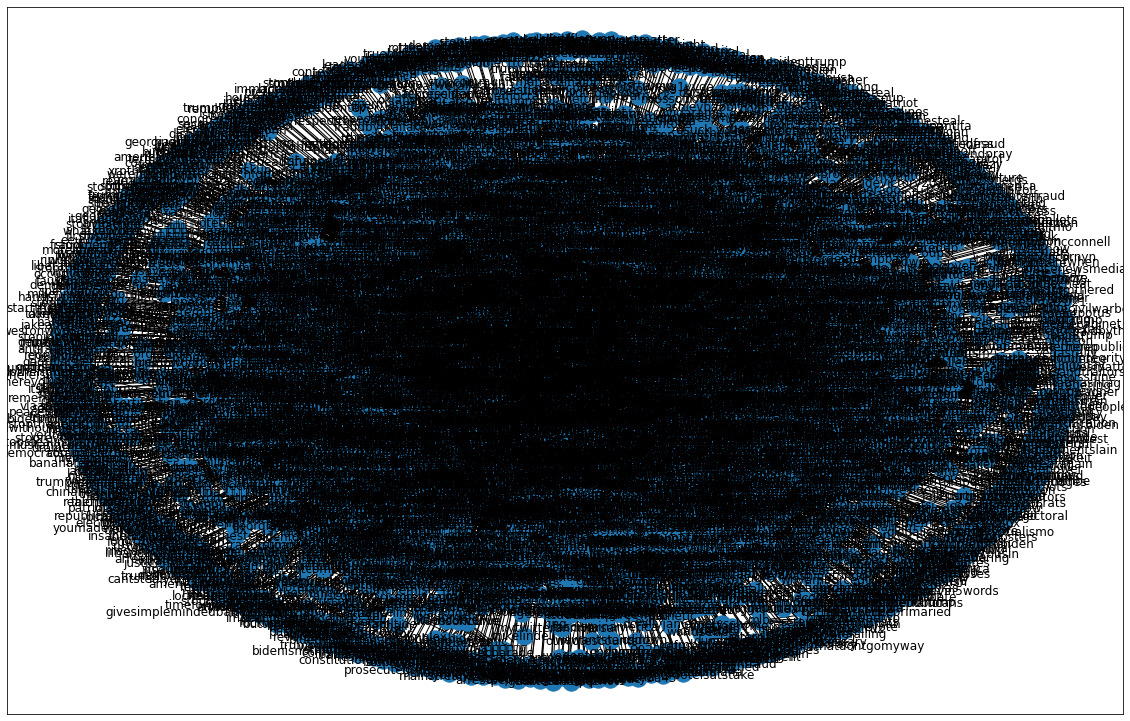

In [140]:
plt.figure(figsize = (20,13))
nx.draw_networkx(hashG, pos=pos)
plt.savefig("hashG-small.png", format = "png", dpi = 300)
plt.show()

In [139]:
# hashG=nx.path_graph('stopthesteal')
nx.write_gexf(hashG, "hash.gexf")